<a href="https://colab.research.google.com/github/dton24/Notes/blob/main/CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 4321
# Dr. Mohammad Salehan
## Classification Trees
East-West Airlines has entered into a partnership with the wireless phone company Telcon to sell the latter's service
via direct mail.  These are a sample of data, provided so that the analyst can develop a model to classify East-West
customers as to whether they purchase a wireless phone service contract (target variable Phone_sale).


### Data Description
* ID#: Unique ID
* Topflight: Indicates whether flyer has attained elite "Topflight" status, 1 = yes, 0 = no
* Balance: Number of miles eligible for award travel
* Qual_miles: Number of miles counted as qualifying for Topflight status
* cc1_miles?: Has member earned miles with airline freq. flyer credit card in the past 12 months (1=Yes/0=No)?
* cc2_miles?: Has member earned miles with Rewards credit card in the past 12 months (1=Yes/0=No)?
* cc3_miles?: Has member earned miles with Small Business credit card in the past 12 months (1=Yes/0=No)?
* Bonus_miles: Number of miles earned from non-flight bonus transactions in the past 12 months
* Bonus_trans: Number of non-flight bonus transactions in the past 12 months
* Flight_miles_12mo: Number of flight miles in the past 12 months
* Flight_trans_12: Number of flight transactions in the past 12 months
* Online_12: Number of online purchases within the past 12 months
* Email: E-mail address on file. 1= yes, 0 =no?
* Club_member: Member of the airline's club (paid membership), 1=yes, 0=no
* Any_cc_miles_12mo: Dummy variable indicating whether member added miles on any credit card type within the past 12 months (1='Y', 0='N')
* Phone_sale: Dummy variable indicating whether member purchased Telcom service as a result of the direct mail campaign (1=sale, 0=no sale)

Enter your name below.

In [ ]:
!pip install dmba

%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [ ]:
df = pd.read_excel('EastWestAirlinesNN.xlsx', 'data')
df.shape

(4987, 16)

In [ ]:
df.head()

,ID#,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Email,Club_member,Any_cc_miles_12mo,Phone_sale
0,1.0,0.0,28143.0,0.0,0.0,1.0,0.0,174.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.0,19244.0,0.0,0.0,0.0,0.0,215.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,41354.0,0.0,1.0,0.0,0.0,4123.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4.0,0.0,14776.0,0.0,0.0,0.0,0.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,1.0,97752.0,0.0,1.0,0.0,0.0,43300.0,26.0,2077.0,4.0,0.0,1.0,0.0,1.0,0.0


1. Examine the proportion of the two classes in the target column.

In [ ]:
# Calculate the proportions of each class in the 'Phone_sale' column
proportions = df['Phone_sale'].value_counts(normalize=True)

# Print out the proportions
print(proportions*100)

0.0    86.860582
1.0    13.139418
Name: Phone_sale, dtype: float64


86.9% of the customers did not purchase a Telcom service.

2. What is the naive rule in this example?

## Select columns
3. Drop column ID.

In [ ]:
df.drop(columns = 'ID#')

,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Email,Club_member,Any_cc_miles_12mo,Phone_sale
0,0.0,28143.0,0.0,0.0,1.0,0.0,174.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,19244.0,0.0,0.0,0.0,0.0,215.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,41354.0,0.0,1.0,0.0,0.0,4123.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,14776.0,0.0,0.0,0.0,0.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,97752.0,0.0,1.0,0.0,0.0,43300.0,26.0,2077.0,4.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,0.0,10013.0,2436.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4983,0.0,4832.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4984,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing values
4. Check missing values. Drop them if needed.

In [ ]:
df.isna().sum()

ID#                  2
Topflight            2
Balance              2
Qual_miles           2
cc1_miles?           2
cc2_miles?           2
cc3_miles?           2
Bonus_miles          1
Bonus_trans          1
Flight_miles_12mo    2
Flight_trans_12      2
Online_12            2
Email                2
Club_member          2
Any_cc_miles_12mo    2
Phone_sale           2
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

ID#                  0
Topflight            0
Balance              0
Qual_miles           0
cc1_miles?           0
cc2_miles?           0
cc3_miles?           0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Online_12            0
Email                0
Club_member          0
Any_cc_miles_12mo    0
Phone_sale           0
dtype: int64

## Dummies
5. Create dummies if any is needed.

Not needed.

## Partitioning
6. Partition the dataset into train and validation partitions. Use 40% for validation. Set random_state to 26.

In [ ]:
X = df.drop(columns = 'Phone_sale')
y = df['Phone_sale']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 26)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Train DecisionTreeClassifier
7. Train a DecisionTreeClassifier with 10-fold cross validation and optimize the following hyperparameters using grid search.   
max_depth: [10, 20, 30, 40]   
min_samples_split: [20, 40, 60, 80, 100]   
min_impurity_decrease: [0, 0.0005, 0.001, 0.005, 0.01]  

In [ ]:
# We are defining the general hyperparameters using grid search. It will help identify the general region where the best hyperparameters will lie.
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 40, 60, 80, 100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}

# Initiate and conduct a grid search with the training data
gridSearch = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search. It will be more specific than the initial parameters. We do this to avoid exhaustive grid searches to save more resources.
param_grid = {

#Choose max_depth range based on the initial parameters. We will choose between 2 and 18 because the initial maximum depth was 10, so we want to explore the numbers surrounding this value.

    'max_depth': list(range(2, 19)),

# We will do the same with min_samples_split

    'min_samples_split': list(range(10, 30)),

# Same with min_impurity_decrease
    'min_impurity_decrease': [00.003, 0.005, 0.007, 0.01]
}

# Initialized grid search instance.
gridSearch = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)

# Use gridSearch instance to fit the training data. This will search through every possible option based on the hyperparameters given in param_grid dictionary.
gridSearch.fit(X_train, y_train)

# After the gridSearch, it finds the best score based on the new hyperparameters. We will use .best_score_ to extract this.
print('Improved score: ', gridSearch.best_score_)

# Same as above, but we find the best parameters
print('Improved parameters: ', gridSearch.best_params_)

# We will create a variable bestClassTree that will give us the best estimator.
bestClassTree = gridSearch.best_estimator_


Initial score:  0.8732865105908584
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 20}
Improved score:  0.8732865105908584
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0.003, 'min_samples_split': 10}


## Plot the best tree
8. Plot the best tree below.

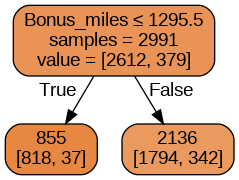

In [ ]:
best_tree = gridSearch.best_estimator_
plotDecisionTree(bestClassTree, feature_names = X_train.columns)

## Evaluate the model
9. Print the classification summary for both train and test sets.

In [ ]:
classificationSummary(y_train, bestClassTree.predict(X_train))
classificationSummary(y_test, bestClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.8733)

       Prediction
Actual    0    1
     0 2612    0
     1  379    0
Confusion Matrix (Accuracy 0.8616)

       Prediction
Actual    0    1
     0 1718    0
     1  276    0


10. Is overfitting a concerns?

11. Compare the performance of the validation set with the naive model. Is this a useful model?